<a href="https://colab.research.google.com/github/Abishek0411/Computer-Vision-Projects/blob/main/CV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2 — Shapes & Regions (Connected Components, Skeletons, Chain Codes)**

Detect objects in a binary image, compute area/perimeter, extract object skeleton, produce Freeman chain code for a chosen boundary, and compute simple shape descriptors (centroid, aspect ratio, Hu moments).

In [1]:
# !pip -q install opencv-python-headless==4.7.0.72 scikit-image matplotlib numpy scipy scikit-learn
import cv2, sys, os, numpy as np, matplotlib.pyplot as plt
from skimage import filters, feature, morphology, measure, color, io
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Objects found: 96


,label,area,perimeter,centroid-0,centroid-1
0,1,8792.0,1297.441738,22.825296,90.538558
1,2,37.0,27.035534,1.081081,302.189189
2,3,21.0,19.414214,0.380952,315.285714
3,4,1.0,0.000000,0.000000,328.000000
4,5,2.0,0.000000,0.500000,337.000000


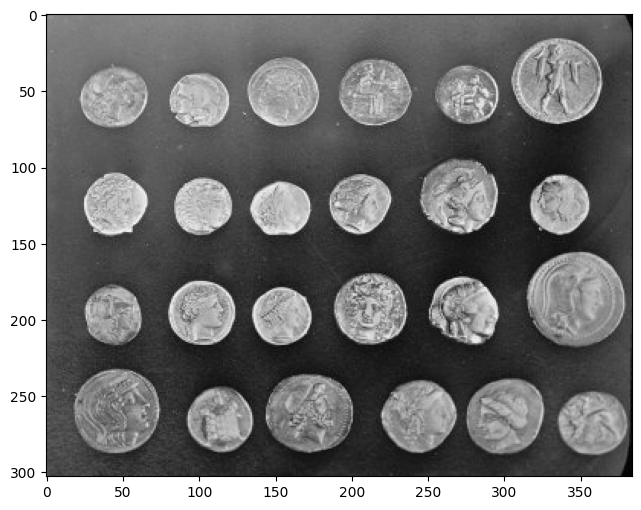

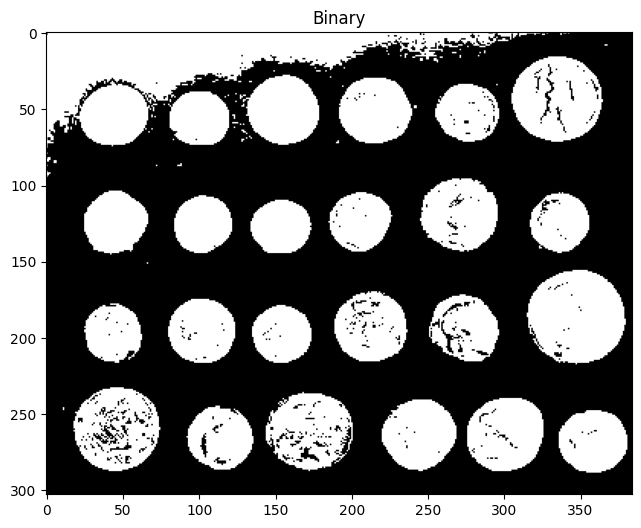

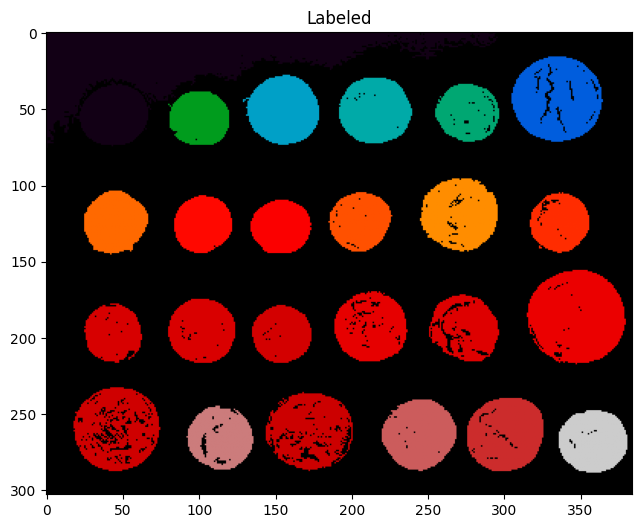

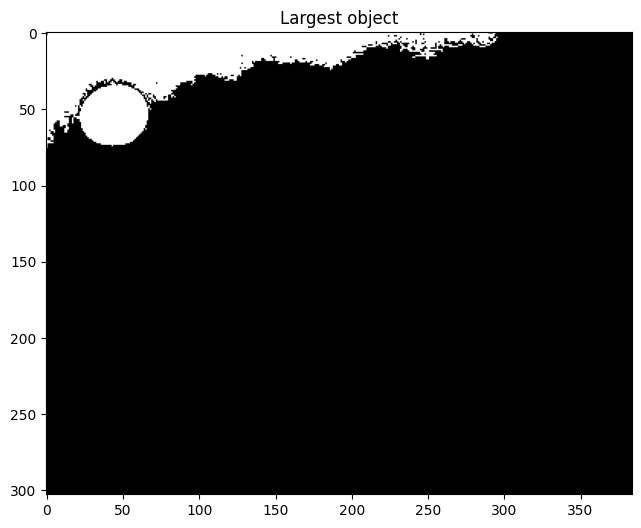

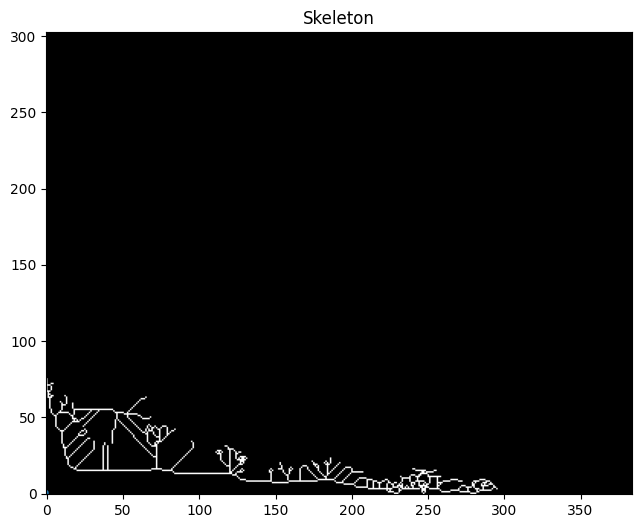

In [2]:
from skimage import data, color, filters, measure, morphology
img = data.coins()
plt.imshow(img, cmap='gray')

# Binarize
th = filters.threshold_otsu(img)
bw = img > th
plt.figure(); plt.imshow(bw, cmap='gray'); plt.title('Binary')

# Label connected components
labels = measure.label(bw)
props = measure.regionprops(labels)
print("Objects found:", len(props))

# Filter small objects
clean = morphology.remove_small_objects(labels, min_size=200)
plt.figure(); plt.imshow(clean, cmap='nipy_spectral'); plt.title('Labeled')

# Skeleton of one object (pick largest)
largest = max(props, key=lambda x: x.area)
mask = labels == largest.label
skeleton = morphology.skeletonize(mask)
plt.figure(); plt.imshow(mask, cmap='gray'); plt.title('Largest object')
plt.figure(); plt.imshow(skeleton, cmap='gray'); plt.title('Skeleton')

# Chain code for boundary
from skimage.measure import find_contours
cnts = find_contours(mask.astype(int), 0.5)
contour = cnts[0]  # Nx2 array
plt.plot(contour[:,1], contour[:,0]); plt.gca().invert_yaxis()

# Compute simple descriptors
from skimage.measure import regionprops_table
import pandas as pd
tbl = regionprops_table(labels, properties=('label','area','perimeter','centroid'))
pd.DataFrame(tbl).head()
